In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel(r'F:\Participants_Data_Final\Data_Train.xlsx')

In [3]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
df.shape

(12690, 9)

In [6]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imp=SimpleImputer(strategy='most_frequent')

In [9]:
for col in ['CITY','LOCALITY','RATING','VOTES']:
    df[col]=imp.fit_transform(df[col].values.reshape(-1,1))

In [10]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

# Summary Statistics

In [11]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


1.minimum cost os food is 20 and max cost is 14000
2.mean is greater than median so COST is right skewed

# EDA

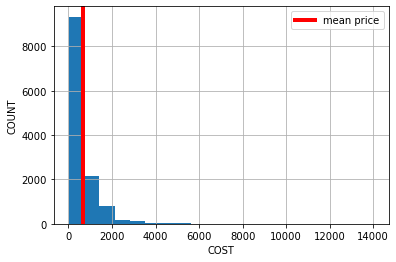

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df['COST'].hist(bins=20)
mean_val=np.mean(df['COST'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean price')
plt.xlabel('COST')
plt.ylabel("COUNT")
plt.legend()
plt.show()

In [13]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [14]:
print(df['TITLE'].value_counts())

QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
                                ... 
BAR,CLUB                           1
CASUAL DINING,DESSERT PARLOR       1
BEVERAGE SHOP,CASUAL DINING        1
DESSERT PARLOR,PAAN SHOP           1
CAFÉ,LOUNGE                        1
Name: TITLE, Length: 113, dtype: int64


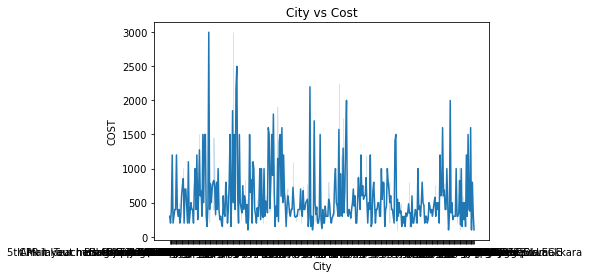

In [15]:
sns.lineplot(x='CITY',y='COST',data=df)
plt.title('City vs Cost')
plt.xlabel('City')
plt.show()

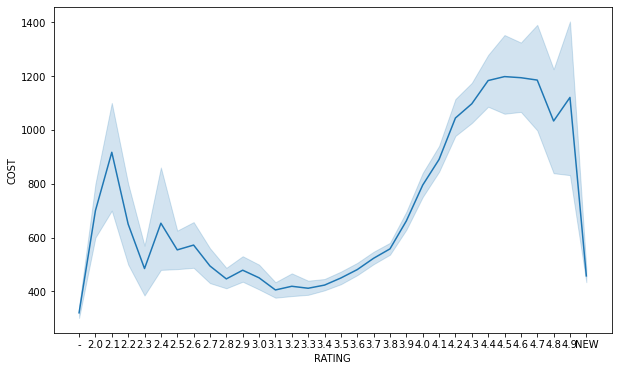

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x='RATING',y='COST',data=df)
plt.show()

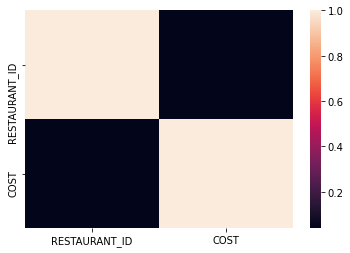

In [17]:
sns.heatmap(df.corr())
plt.show()

In [18]:
df.drop('RESTAURANT_ID',axis=1,inplace=True)

In [19]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ['TITLE','CUISINES','TIME','CITY','LOCALITY','VOTES','RATING']:
    df[col]=le.fit_transform(df[col])

In [21]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,17,1278,1200
1,33,289,1885,67,1046,23,950,1500
2,31,2976,661,67,1101,19,712,800
3,95,4130,275,222,136,22,787,800
4,50,1766,615,222,620,19,470,300


In [22]:
df.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,142.281403,652.391568,18.795902,991.443578,655.252246
std,32.762427,1204.091664,754.459944,83.921428,399.116379,6.181352,482.531198,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,16.000000,619.000000,300.000000
50%,59.000000,2416.500000,1123.000000,131.000000,582.000000,19.000000,1100.000000,500.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1009.000000,22.000000,1341.000000,800.000000
max,112.000000,4154.000000,2688.000000,358.000000,1415.000000,31.000000,1846.000000,14000.000000


Text(0.5, 1.0, 'Correlation with target variable')

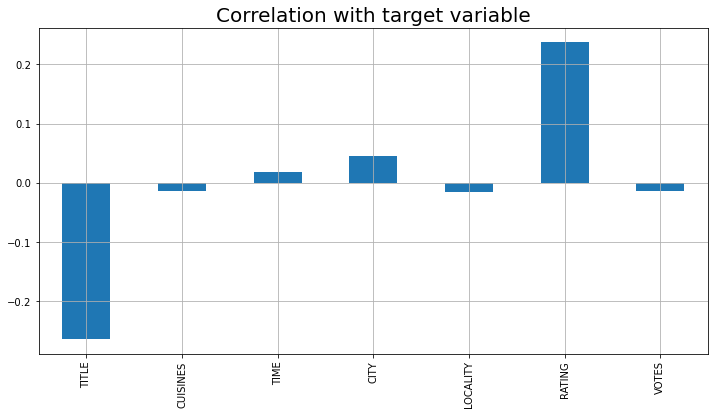

In [23]:
plt.figure(figsize=(12,6))
df.drop('COST',axis=1).corrwith(df['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target variable",fontsize=20)

In [24]:
df.skew()

TITLE      -0.069803
CUISINES   -0.218782
TIME        0.306186
CITY        0.266332
LOCALITY    0.352317
RATING     -0.803390
VOTES      -0.316806
COST        3.978801
dtype: float64

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))
z

array([[0.86888688, 0.32540837, 0.58465845, ..., 0.29054698, 0.59388432,
        0.86884552],
       [0.80783894, 1.61638078, 0.93436872, ..., 0.68015275, 0.08589126,
        1.34733058],
       [0.86888688, 0.61526483, 0.68804774, ..., 0.0330196 , 0.57914305,
        0.23086546],
       ...,
       [0.35207201, 0.12224961, 0.057108  , ..., 0.35658617, 0.9047573 ,
        1.02834054],
       [0.86888688, 1.055448  , 0.87074455, ..., 0.45233026, 0.00944312,
        0.40711461],
       [0.86888688, 0.59034881, 0.4574101 , ..., 0.61411355, 1.06433876,
        0.08812458]])

In [27]:
threshold=3
print(np.where(z>3))

(array([   13,    84,    85,   156,   178,   208,   235,   253,   308,
         329,   337,   369,   374,   379,   392,   396,   422,   428,
         438,   452,   453,   455,   469,   473,   480,   502,   508,
         563,   577,   604,   615,   625,   644,   690,   731,   749,
         751,   772,   787,   831,   838,   839,   874,   911,   919,
         949,   966,   967,   973,   981,   993,   994,  1009,  1054,
        1126,  1133,  1193,  1196,  1205,  1227,  1287,  1288,  1297,
        1345,  1365,  1366,  1395,  1468,  1470,  1472,  1475,  1502,
        1543,  1555,  1581,  1594,  1596,  1597,  1632,  1635,  1657,
        1696,  1701,  1711,  1748,  1759,  1764,  1778,  1792,  1806,
        1828,  1839,  1855,  1878,  1884,  1884,  1903,  1916,  1930,
        1931,  1983,  2025,  2039,  2053,  2082,  2092,  2096,  2100,
        2109,  2111,  2115,  2124,  2205,  2207,  2251,  2254,  2313,
        2327,  2333,  2339,  2349,  2369,  2407,  2434,  2439,  2459,
        2479,  2488

In [28]:
z[13][5]

3.040862860807884

In [29]:
df1=df[(z<3).all(axis=1)]

In [30]:
df1.shape

(11972, 8)

In [31]:
df.shape

(12690, 8)

In [32]:
df1.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES',
       'COST'],
      dtype='object')

In [33]:
x=df1.drop('COST',axis=1)
x.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,2627,739,320,285,17,1278
1,33,289,1885,67,1046,23,950
2,31,2976,661,67,1101,19,712
3,95,4130,275,222,136,22,787
4,50,1766,615,222,620,19,470


In [34]:
y=df1['COST']
y.head()

0    1200
1    1500
2     800
3     800
4     300
Name: COST, dtype: int64

In [35]:
y=pd.DataFrame(y)

In [36]:
y.head()

,COST
0,1200
1,1500
2,800
3,800
4,300


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr=LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
predlr=lr.predict(x_test)

In [43]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [46]:
model=[lr,SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]

In [48]:
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('R2 score:',r2_score(y_test,predm))
    print('***********************************************************************')
    print('\n')
    

Score of LinearRegression() is: 0.18415730652057827
MAE: 279.1909196051879
MSE: 159829.42278372744
R2 score: 0.2076515223701012
***********************************************************************




C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score of SVR() is: -0.06611743856864338
MAE: 301.4210402003165
MSE: 211953.55154303877
R2 score: -0.050751926449899454
***********************************************************************


Score of DecisionTreeRegressor() is: 0.9999993806127687
MAE: 227.01920668058455
MSE: 113900.33444676409
R2 score: 0.4353432864326263
***********************************************************************


Score of KNeighborsRegressor() is: 0.37879668840770986
MAE: 299.24968684759915
MSE: 179662.2935281837
R2 score: 0.10933079601257345
***********************************************************************




<ipython-input-48-eee45f56043f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(x_train,y_train)


Score of RandomForestRegressor() is: 0.9569153326958436
MAE: 173.7238357689631
MSE: 65108.558475128746
R2 score: 0.67722671902374
***********************************************************************




C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score of AdaBoostRegressor() is: 0.34323773431582305
MAE: 272.55209160493416
MSE: 135497.57640328436
R2 score: 0.3282757547653865
***********************************************************************




In [50]:
model=[lr,SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor()]

In [52]:
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean score:',score.mean())
    print('Standard Deviation',score.std())
    print('**************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.17472441 0.19361562 0.16648931 0.20128816 0.18380588 0.20528259
 0.18785564 0.16657536 0.17168564 0.2162869 ]
Mean score: 0.18676095189031566
Standard Deviation 0.016350323361678146
**************************************************************************




C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

Model: SVR()
Score: [-0.05851163 -0.07235493 -0.0424649  -0.03986467 -0.06822219 -0.07198001
 -0.06411727 -0.09417126 -0.07670609 -0.08179712]
Mean score: -0.06701900867899324
Standard Deviation 0.015890456150793555
**************************************************************************


Model: DecisionTreeRegressor()
Score: [0.39637562 0.37171216 0.3093032  0.42862514 0.33105103 0.40767443
 0.42194696 0.4282209  0.42538954 0.4224204 ]
Mean score: 0.3942719393260399
Standard Deviation 0.04094971047132097
**************************************************************************


Model: KNeighborsRegressor()
Score: [0.05986588 0.17171027 0.04886818 0.09923483 0.07182473 0.08960198
 0.09678153 0.06501964 0.0822456  0.02190398]
Mean score: 0.08070566160850402
Standard Deviation 0.037677049433571516
**************************************************************************




C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A co

Model: RandomForestRegressor()
Score: [0.71574887 0.6958314  0.63236901 0.70241601 0.67975151 0.67162716
 0.68842681 0.68354219 0.72655728 0.71806798]
Mean score: 0.6914338215838728
Standard Deviation 0.026005684842577113
**************************************************************************




C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Siddharth\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

Model: AdaBoostRegressor()
Score: [0.34576138 0.36697134 0.24553484 0.36104811 0.36830575 0.34734823
 0.35827515 0.29865565 0.35512195 0.40313524]
Mean score: 0.3450157659048617
Standard Deviation 0.041217759232966666
**************************************************************************




In [53]:
import joblib

In [54]:
joblib.dump(RandomForestRegressor(),'Restaurant_food_cost.pkl')

['Restaurant_food_cost.pkl']